<a href="https://colab.research.google.com/github/BrianKirii/BrianKirii/blob/main/Copy_of_Untitled8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics.pairwise import cosine_similarity

from sklearn.metrics import mean_squared_error

In [ ]:
#Import the data set
df = pd.read_csv('ratings_Electronics.csv', header=None) #There are no headers in the data file

df.columns = ['user_id', 'prod_id', 'rating', 'timestamp'] #Adding column names

df = df.drop('timestamp', axis=1) #Dropping timestamp

df_copy = df.copy(deep=True) #Copying the data to another dataframe

In [ ]:
# see few rows of the imported dataset
df.head()

,user_id,prod_id,rating
0,AKM1MP6P0OYPR,0132793040,5.0
1,A2CX7LUOHB2NDG,0321732944,5.0
2,A2NWSAGRHCP8N5,0439886341,1.0
3,A2WNBOD3WNDNKT,0439886341,3.0
4,A1GI0U4ZRJA8WN,0439886341,1.0


# **Exploratory Data Analysis (5 marks)**
Shape of the data

In [ ]:
# Check the number of rows and columns
rows, columns = df.shape
print("No of rows: ", rows)
print("No of columns: ", columns)

No of rows:  618233
No of columns:  3


# **Data types**

In [ ]:
#Check Data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 618233 entries, 0 to 618232
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   user_id  618233 non-null  object 
 1   prod_id  618233 non-null  object 
 2   rating   618233 non-null  float64
dtypes: float64(1), object(2)
memory usage: 14.2+ MB


# Checking for missing values

In [ ]:
# Find number of missing values in each column
df.isna().sum()

,0
user_id,0
prod_id,0
rating,0


# Summary Statistics

In [ ]:
# Summary statistics of 'rating' variable
df['rating'].describe()

,rating
count,618233.000000
mean,3.978037
std,1.398720
min,1.000000
25%,3.000000
50%,5.000000
75%,5.000000
max,5.000000


# Checking the rating distribution

Check the distribution of ratings and provide observations from the plot

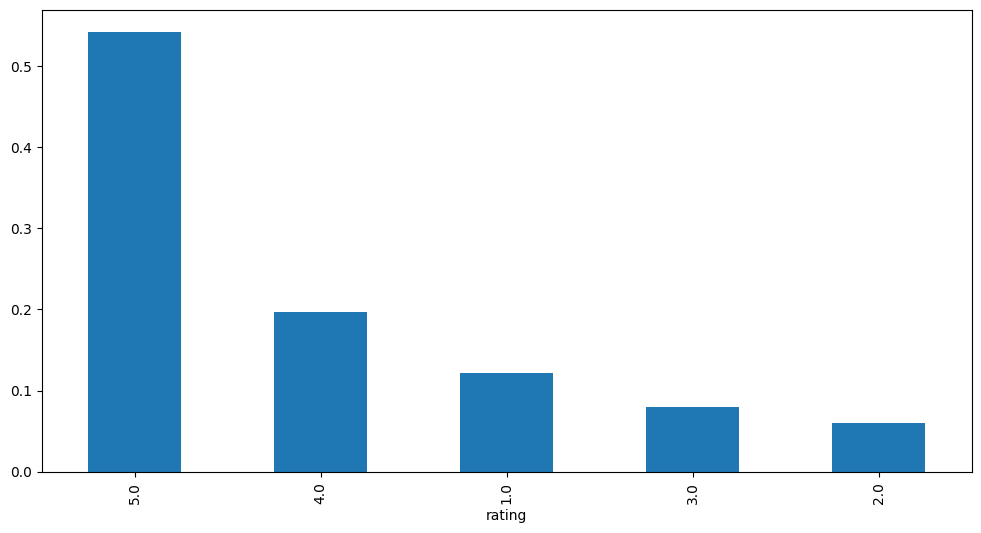

In [ ]:
#Create the plot and provide observations

plt.figure(figsize = (12,6))
df['rating'].value_counts(1).plot(kind='bar')
plt.show()

# Checking the number of unique users and items in the dataset

In [ ]:
# Number of unique user id and product id in the data
print('Number of unique USERS in Raw data = ', df['user_id'].nunique())
print('Number of unique ITEMS in Raw data = ', df['prod_id'].nunique())

Number of unique USERS in Raw data =  490591
Number of unique ITEMS in Raw data =  37559


# Users with most number of ratings

In [ ]:
# Top 10 users based on rating
most_rated = df.groupby('user_id').size().sort_values(ascending=False)[:10]
most_rated

,0
user_id,
A5JLAU2ARJ0BO,348
A231WM2Z2JL0U3,249
A25HBO5V8S8SEA,161
AKT8TGIT6VVZ5,97
AT6CZDCP4TRGA,96
A6FIAB28IS79,95
A11D1KHM7DVOQK,92
A2B7BUH8834Y6M,91
A2AEZQ3DGBBLPR,79


The data with the highest ratings for a user is 520, and thus does not match the number of products in the data. The recommendation system should be upto date with the products that are not present in the data.

# Data preparation

In [ ]:
counts = df['user_id'].value_counts()
df_final = df[df['user_id'].isin(counts[counts >= 50].index)]

In [ ]:
print('The number of observations in the final data =', len(df_final))
print('Number of unique USERS in the final data = ', df_final['user_id'].nunique())
print('Number of unique PRODUCTS in the final data = ', df_final['prod_id'].nunique())

The number of observations in the final data = 2183
Number of unique USERS in the final data =  24
Number of unique PRODUCTS in the final data =  1893


The dataframe has more than 50 items. There is need for df_final in building the final recommendation.

# Checking the density of the rating matrix

In [ ]:
#Creating the interaction matrix of products and users based on ratings and replacing NaN value with 0
final_ratings_matrix = df_final.pivot(index = 'user_id', columns ='prod_id', values = 'rating').fillna(0)
print('Shape of final_ratings_matrix: ', final_ratings_matrix.shape)

#Finding the number of non-zero entries in the interaction matrix
given_num_of_ratings = np.count_nonzero(final_ratings_matrix)
print('given_num_of_ratings = ', given_num_of_ratings)

#Finding the possible number of ratings as per the number of users and products
possible_num_of_ratings = final_ratings_matrix.shape[0] * final_ratings_matrix.shape[1]
print('possible_num_of_ratings = ', possible_num_of_ratings)

#Density of ratings
density = (given_num_of_ratings/possible_num_of_ratings)
density *= 100
print ('density: {:4.2f}%'.format(density))

final_ratings_matrix.head()

Shape of final_ratings_matrix:  (24, 1893)
given_num_of_ratings =  2183
possible_num_of_ratings =  45432
density: 4.80%


prod_id,1400532655,B000000O48,B000001OL6,B000001OMN,B00000J05A,B00000J061,B00000J0E8,B00000J1E6,B00000J1EP,B00000J1G6,...,B0007RB1X6,B0007RB2BM,B0007RXD78,B0007SL4IW,B0007SM8QE,B0007SXHP0,B0007TC38Q,B0007TC390,B0007TJ5AK,B0007TJ5OG
user_id,,,,,,,,,,,,,,,,,,,,,
A11D1KHM7DVOQK,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A12DLJESJKM1OQ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A149RNR5RH19YY,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A1F9Z42CFF9IAY,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0
A1FR68QH6Z4YZM,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


The current number of ratings is 4.80%

# **Rank Based Recommendation System**

In [ ]:
#Calculate the average rating for each product
average_rating = df_final.groupby('prod_id').mean()['rating']

#Calculate the count of ratings for each product
count_rating = df_final.groupby('prod_id').count()['rating']

#Create a dataframe with calculated average and count of ratings
final_rating = pd.DataFrame({'avg_rating':average_rating, 'rating_count':count_rating})

#Sort the dataframe by average of ratings
final_rating = final_rating.sort_values(by='avg_rating',ascending=False)

final_rating.head()

In [ ]:
#defining a function to get the top n products based on highest average rating and minimum interactions
def top_n_products(final_rating, n, min_interaction):

    #Finding movies with minimum number of interactions
    recommendations = final_rating[final_rating['rating_count']>min_interaction]

    #Sorting values w.r.t average rating
    recommendations = recommendations.sort_values('avg_rating',ascending=False)

    return recommendations.index[:n]

# Recommending top 5 products with 50 minimum interactions based on popularity

In [ ]:
list(top_n_products(final_rating, 5, 50))

In [ ]:
['B001TH7GUU', 'B003ES5ZUU', 'B0019EHU8G', 'B006W8U2MU', 'B000QUUFRW']

# Recommending top 5 products with 100 minimum interactions based on popularity

In [ ]:
list(top_n_products(final_rating, 5, 100))

# Collaborative Filtering based Recommendation System

In [ ]:
final_ratings_matrix.head()

prod_id,1400532655,B000000O48,B000001OL6,B000001OMN,B00000J05A,B00000J061,B00000J0E8,B00000J1E6,B00000J1EP,B00000J1G6,...,B0007RB1X6,B0007RB2BM,B0007RXD78,B0007SL4IW,B0007SM8QE,B0007SXHP0,B0007TC38Q,B0007TC390,B0007TJ5AK,B0007TJ5OG
user_id,,,,,,,,,,,,,,,,,,,,,
A11D1KHM7DVOQK,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A12DLJESJKM1OQ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A149RNR5RH19YY,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A1F9Z42CFF9IAY,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0
A1FR68QH6Z4YZM,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
final_ratings_matrix['user_index'] = np.arange(0, final_ratings_matrix.shape[0])
final_ratings_matrix.set_index(['user_index'], inplace=True)

# Actual ratings given by users
final_ratings_matrix.head()

prod_id,1400532655,B000000O48,B000001OL6,B000001OMN,B00000J05A,B00000J061,B00000J0E8,B00000J1E6,B00000J1EP,B00000J1G6,...,B0007RB1X6,B0007RB2BM,B0007RXD78,B0007SL4IW,B0007SM8QE,B0007SXHP0,B0007TC38Q,B0007TC390,B0007TJ5AK,B0007TJ5OG
user_index,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# defining a function to get similar users
def similar_users(user_index, interactions_matrix):
    similarity = []
    for user in range(0, interactions_matrix.shape[0]): #  .shape[0] gives number of rows

        #finding cosine similarity between the user_id and each user
        sim = cosine_similarity([interactions_matrix.loc[user_index]], [interactions_matrix.loc[user]])

        #Appending the user and the corresponding similarity score with user_id as a tuple
        similarity.append((user,sim))

    similarity.sort(key=lambda x: x[1], reverse=True)
    most_similar_users = [tup[0] for tup in similarity] #Extract the user from each tuple in the sorted list
    similarity_score = [tup[1] for tup in similarity] ##Extracting the similarity score from each tuple in the sorted list

    #Remove the original user and its similarity score and keep only other similar users
    most_similar_users.remove(user_index)
    similarity_score.remove(similarity_score[0])

    return most_similar_users, similarity_score

Finding out top 10 similar users to the user index 3 and their similarity score

In [ ]:
similar = similar_users(3,final_ratings_matrix)[0][0:10]
similar

[6, 5, 9, 12, 17, 19, 1, 16, 8, 7]

In [ ]:
#Print the similarity score
similar_users(3,final_ratings_matrix)[1][0:10]

[array([[0.06705573]]),
 array([[0.05320144]]),
 array([[0.04413065]]),
 array([[0.04392064]]),
 array([[0.03789248]]),
 array([[0.03732183]]),
 array([[0.03477813]]),
 array([[0.03194738]]),
 array([[0.02322381]]),
 array([[0.0219463]])]

# Finding out top 10 similar users to the user index 1521 and their similarity score

In [ ]:
%%time
similar = similar_users(1521, final_ratings_matrix)[0][0:10]
similar

In [ ]:
%%time
#Print the similarity score
similar_users(1521,final_ratings_matrix)[1][0:10]

In [ ]:
# defining the recommendations function to get recommendations by using the similar users' preferences
def recommendations(user_index, num_of_products, interactions_matrix):

    #Saving similar users using the function similar_users defined above
    most_similar_users = similar_users(user_index, interactions_matrix)[0]

    #Finding product IDs with which the user_id has interacted
    prod_ids = set(list(interactions_matrix.columns[np.where(interactions_matrix.loc[user_index] > 0)]))
    recommendations = []

    observed_interactions = prod_ids.copy()
    for similar_user in most_similar_users:
        if len(recommendations) < num_of_products:

            #Finding 'n' products which have been rated by similar users but not by the user_id
            similar_user_prod_ids = set(list(interactions_matrix.columns[np.where(interactions_matrix.loc[similar_user] > 0)]))
            recommendations.extend(list(similar_user_prod_ids.difference(observed_interactions)))
            observed_interactions = observed_interactions.union(similar_user_prod_ids)
        else:
            break

    return recommendations[:num_of_products]

# Recommend 5 products to user index 3 based on similarity based collaborative filtering

In [ ]:
recommendations(3,5,final_ratings_matrix)

['B00004T1M1', 'B00004ZBTT', 'B00005AWBJ', 'B00005Y3V6', 'B00004Y7TD']

# Recommend 5 products to user index 1521 based on similarity based collaborative filtering

In [ ]:
%%time
recommendations(1521,5,final_ratings_matrix)

# Model based Collaborative Filtering: Singular Value Decomposition
We have seen above that the interaction matrix is highly sparse. SVD is best to apply on a large sparse matrix. Note that for sparse matrices, we can use the sparse.linalg.svds() function to perform the decomposition

In [ ]:
from scipy.sparse.linalg import svds # for sparse matrices

# Singular Value Decomposition
U, s, Vt = svds(final_ratings_matrix, k = 50) # here k is the number of latent features

# Construct diagonal array in SVD
sigma = np.diag(s)

In [ ]:
U.shape #checking the shape of the U matrix

In [ ]:
%%time
sigma.shape #checking the shape of the sigma matrix

In [ ]:
%%time
Vt.shape #checking the shape of the Vt matrix

In [ ]:
all_user_predicted_ratings = np.dot(np.dot(U, sigma), Vt)

# Predicted ratings
preds_df = pd.DataFrame(abs(all_user_predicted_ratings), columns = final_ratings_matrix.columns)
preds_df.head()

In [ ]:
%%time
# Recommend the items with the highest predicted ratings

def recommend_items(user_index, interactions_matrix, preds_df, num_recommendations):

    # Get and sort the user's ratings from the actual and predicted interaction matrix
    sorted_user_ratings = interactions_matrix.loc[user_index].sort_values(ascending=False)
    sorted_user_predictions = preds_df.loc[user_index].sort_values(ascending=False)

    #Creating a dataframe with actual and predicted ratings columns
    temp = pd.concat([sorted_user_ratings,sorted_user_predictions], axis=1)
    temp.index.name = 'Recommended Products'
    temp.columns = ['user_ratings', 'user_predictions']

    #Filtering the dataframe where actual ratings are 0 which implies that the user has not interacted with that product
    temp = temp.loc[temp.user_ratings == 0]

    #Recommending products with top predicted ratings
    temp = temp.sort_values('user_predictions',ascending=False)#Sort the dataframe by user_predictions in descending order
    print('\nBelow are the recommended products for user(user_id = {}):\n'.format(user_index))
    print(temp['user_predictions'].head(num_recommendations))

CPU times: user 6 µs, sys: 0 ns, total: 6 µs
Wall time: 10.5 µs


# Recommending top 5 products to user id 121

In [ ]:
#Enter 'user index' and 'num_recommendations' for the user
recommend_items(121,final_ratings_matrix,preds_df,5)

In [ ]:
#Enter 'user_index' and 'num_recommendations' for the user #
recommend_items(465,final_ratings_matrix,preds_df,5)

# Evaluate the model (10 marks)
Evaluation of the Model based Collaborative Filtering (SVD)

In [ ]:
# Actual ratings given by the users
final_ratings_matrix.head()

prod_id,1400532655,B000000O48,B000001OL6,B000001OMN,B00000J05A,B00000J061,B00000J0E8,B00000J1E6,B00000J1EP,B00000J1G6,...,B0007RB1X6,B0007RB2BM,B0007RXD78,B0007SL4IW,B0007SM8QE,B0007SXHP0,B0007TC38Q,B0007TC390,B0007TJ5AK,B0007TJ5OG
user_index,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Find average actual rating for each item
average_rating = final_ratings_matrix.mean()
average_rating.head()

,0
prod_id,
1400532655,0.041667
B000000O48,0.208333
B000001OL6,0.166667
B000001OMN,0.083333
B00000J05A,0.125000


In [ ]:
# Predicted ratings
preds_df.head()

In [ ]:
# Find average predicted rating for each item
#preds_df.columns = preds_df.columns.str.strip()
avg_preds=preds_df.mean()
avg_preds.head()

In [ ]:
#create a dataframe containing average actual ratings and avearge predicted ratings for each product
rmse_df = pd.concat([average_rating, avg_preds], axis=1)

rmse_df.columns = ['Avg_actual_ratings', 'Avg_predicted_ratings']

rmse_df.head()

In [ ]:
#Calculate and print RMSE using the mean_square_error function
RMSE=mean_squared_error(rmse_df['Avg_actual_ratings'], rmse_df['Avg_predicted_ratings'], squared=False)
print('\nRMSE SVD Model = {} \n'.format(RMSE))

# Recommendation (2 marks)

Recommend top 10 products to the user id 100

In [ ]:
# Enter 'user_index' and 'num_recommendations' for the user #
recommend_items(100,final_ratings_matrix,preds_df,10)

Recommendation
The density from the above observations is 4.7%. For this reason, the recommendation model that will be employed is: rank based recommendation, collaborative filtering using cosine similarity and lastly model based recommendation filtering using SVD. The Model based filtering using SVD is the most effective.

In [1]:
!jupyter nbconvert --to html Copy_of_Untitled8.ipynb

[NbConvertApp] WARNING | pattern 'Copy_of_Untitled8.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
--execu